In [405]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


In [406]:
# Pull vaccine data
vaccine = pd.read_csv("../datasets/cleaned_covid19_vaccinations.csv")

In [407]:
# Pull cleaned unemployment data
unemployment = pd.read_csv("../datasets/filtered_unemployment_data.csv")

unemployment.rename(columns={"Unnamed: 0" : "State"}, inplace = True)

# Rename everything in the state column
new_names = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Conneticut",
             "Delaware", "District of Columbia", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa",
             "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan",
             "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire",
             "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma",
             "Oregan", "Pennysylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee",
             "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

unemployment["State"] = new_names
display(unemployment)


,State,EMPLOYMENT STATUS,Population 16 years and over,In labor force,Civilian labor force,Employed,Unemployed,Percent of civilian labor force,Armed forces
0,Alabama,NaN,"4,093,740",58.6%,58.2%,55.7%,2.5%,4.3%,0.4%
1,Alaska,NaN,"575,934",67.0%,62.8%,59.9%,2.9%,4.6%,4.2%
2,Arizona,NaN,"5,961,733",60.7%,60.3%,57.7%,2.6%,4.3%,0.4%
3,Arkansas,NaN,"2,430,600",57.8%,57.5%,54.9%,2.6%,4.5%,0.3%
4,California,NaN,"31,552,708",63.9%,63.4%,60.0%,3.4%,5.3%,0.5%
5,Colorado,NaN,"4,776,317",68.9%,67.9%,65.6%,2.4%,3.5%,0.9%
6,Conneticut,NaN,"2,986,455",65.7%,65.4%,62.3%,3.1%,4.7%,0.2%
7,Delaware,NaN,"835,365",62.7%,62.4%,59.7%,2.7%,4.3%,0.4%
8,District of Columbia,NaN,"557,547",71.8%,70.9%,67.2%,3.6%,5.1%,0.9%
9,Florida,NaN,"18,459,053",59.6%,59.2%,56.8%,2.4%,4.0%,0.4%


In [408]:
# Merge unemployment data with vaccine data
vaccine_unemployed = pd.merge(vaccine, unemployment, on = "State", how = "right")
display(vaccine_unemployed)

,State,Total doses administered by jurisdiction,Residents with a completed primary series,Percent of total pop with a completed primary series,Residents 18+ with a completed primary series,Percent of 18+ pop with a completed primary series,Residents 65+ with a completed primary series,Percent of 65+ pop with a completed primary series,EMPLOYMENT STATUS,Population 16 years and over,In labor force,Civilian labor force,Employed,Unemployed,Percent of civilian labor force,Armed forces
0,Alabama,7018011.0,2611593.0,53.3,2416344.0,63.3,725159.0,85.3,NaN,"4,093,740",58.6%,58.2%,55.7%,2.5%,4.3%,0.4%
1,Alaska,1328221.0,477592.0,65.3,418608.0,75.9,81999.0,89.5,NaN,"575,934",67.0%,62.8%,59.9%,2.9%,4.6%,4.2%
2,Arizona,14647405.0,4821350.0,66.2,4239941.0,75.2,1188267.0,90.8,NaN,"5,961,733",60.7%,60.3%,57.7%,2.6%,4.3%,0.4%
3,Arkansas,4874091.0,1720209.0,57.0,1547724.0,66.8,440981.0,84.2,NaN,"2,430,600",57.8%,57.5%,54.9%,2.6%,4.5%,0.3%
4,California,88487852.0,29588939.0,74.9,25681179.0,83.9,5441414.0,93.2,NaN,"31,552,708",63.9%,63.4%,60.0%,3.4%,5.3%,0.5%
5,Colorado,13033446.0,4248431.0,73.8,3729317.0,82.9,818078.0,95.0,NaN,"4,776,317",68.9%,67.9%,65.6%,2.4%,3.5%,0.9%
6,Conneticut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,986,455",65.7%,65.4%,62.3%,3.1%,4.7%,0.2%
7,Delaware,2169125.0,715787.0,73.5,641112.0,83.2,193640.0,95.0,NaN,"835,365",62.7%,62.4%,59.7%,2.7%,4.3%,0.4%
8,District of Columbia,2137377.0,644085.0,91.3,569871.0,95.0,95949.0,95.0,NaN,"557,547",71.8%,70.9%,67.2%,3.6%,5.1%,0.9%
9,Florida,42267369.0,14971549.0,69.7,13732833.0,79.6,4244393.0,94.4,NaN,"18,459,053",59.6%,59.2%,56.8%,2.4%,4.0%,0.4%


In [409]:
column_to_check = 'Percent of total pop with a completed primary series'

# Filter states with NaN values in the specified column
nan_states = vaccine_unemployed[vaccine_unemployed[column_to_check].isna()]['State'].tolist()
display(nan_states)

# Remove NaN values
vaccine_unemployed = vaccine_unemployed.dropna(subset=['Percent of total pop with a completed primary series'])

['Conneticut', 'Oregan', 'Pennysylvania']

In [410]:
# Fix funky column names
vaccine_unemployed.columns = vaccine_unemployed.columns.str.strip() # Strip invisible trailing white space

vaccine_unemployed.rename(columns={'                Unemployed' : "Unemployed"})
print(vaccine_unemployed.columns)

# Remove the % sign
vaccine_unemployed['Unemployed'] = vaccine_unemployed['Unemployed'].str.replace('%', '', regex=False)


Index(['State', 'Total doses administered by jurisdiction',
       'Residents with a completed primary series',
       'Percent of total pop with a completed primary series',
       'Residents 18+ with a completed primary series',
       'Percent of 18+ pop with a completed primary series',
       'Residents 65+ with a completed primary series',
       'Percent of 65+ pop with a completed primary series',
       'EMPLOYMENT STATUS', 'Population 16 years and over', 'In labor force',
       'Civilian labor force', 'Employed', 'Unemployed',
       'Percent of civilian labor force', 'Armed forces'],
      dtype='object')


<Figure size 50000x100000 with 0 Axes>

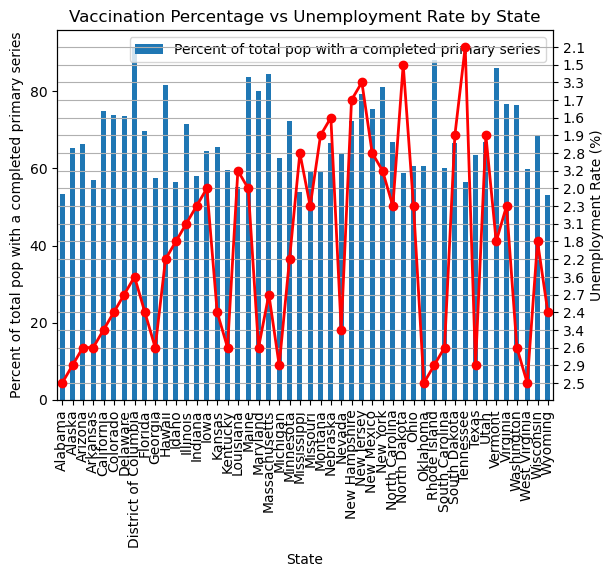

In [411]:
# Create bar chart comparing unemployment rate and vaccination rate per state

vaccine_unemployed.set_index('State', inplace=True)

# Plotting
plt.figure(figsize=(500, 1000))
ax = vaccine_unemployed.plot(kind='bar', y='Percent of total pop with a completed primary series', rot=90)
ax2 = ax.twinx()
ax2.plot(vaccine_unemployed['Unemployed'].values, linestyle='-', marker='o', linewidth=2.0, color='r')

ax.set_ylabel('Percent of total pop with a completed primary series')
ax2.set_ylabel('Unemployment Rate (%)')
plt.title('Vaccination Percentage vs Unemployment Rate by State')
plt.grid(True)
plt.show()

In [412]:
# Correlation between vaccinated and unemployment rates
vaccine_unemployed_sorted = vaccine_unemployed.sort_values(by='Unemployed')

# Convert to string type
vaccine_unemployed_sorted['Unemployed'] = pd.to_numeric(vaccine_unemployed_sorted['Unemployed'], errors='coerce')
vaccine_unemployed_sorted['Percent of total pop with a completed primary series'] = pd.to_numeric(vaccine_unemployed_sorted['Percent of total pop with a completed primary series'], errors='coerce')

#unemployment_graph = plt.scatter(vaccine_unemployed_sorted['Unemployed'], vaccine_unemployed_sorted['Percent of total pop with a completed primary series'])


In [413]:
# Convert 'Unemployed' column to numeric, errors will be set as NaN
vaccine_unemployed_sorted['Unemployed'] = pd.to_numeric(vaccine_unemployed_sorted['Unemployed'], errors='coerce')

# Convert 'Percent of total pop with a completed primary series' column to numeric
vaccine_unemployed_sorted['Percent of total pop with a completed primary series'] = pd.to_numeric(vaccine_unemployed_sorted['Percent of total pop with a completed primary series'], errors='coerce')

# After conversion, you might want to handle NaN values. You can drop them or fill them.
# For example, to drop rows with NaN values:
vaccine_unemployed_sorted.dropna(subset=['Unemployed', 'Percent of total pop with a completed primary series'], inplace=True)

# Now, you can assign the columns to x_data and y_data
x_data = vaccine_unemployed_sorted['Unemployed']
y_data = vaccine_unemployed_sorted['Percent of total pop with a completed primary series']

The r-value is: 0.20592933766899052


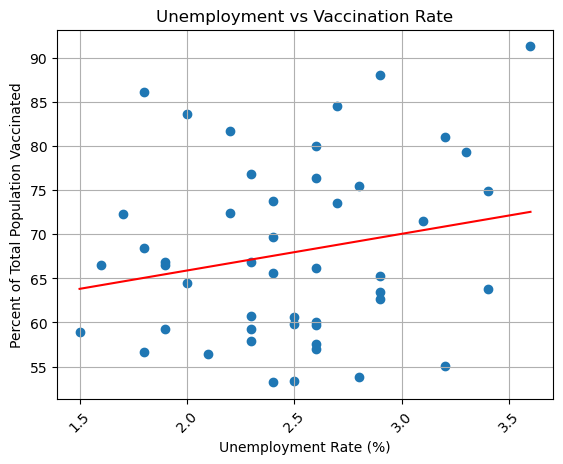

In [414]:
# Labeling
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Percent of Total Population Vaccinated')
plt.title('Unemployment vs Vaccination Rate')
plt.grid(True)

plt.xticks(rotation=45)  # Rotates labels by 45 degrees

# Linear regression line
x_data = vaccine_unemployed_sorted['Unemployed']
y_data = vaccine_unemployed_sorted['Percent of total pop with a completed primary series']

slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

print(f"The r-value is: {r_value}")
# Calculate regression values
reg_values = x_data * slope + intercept

# Create scatter plot
plt.scatter(x_data, y_data)

# Add regression line to plot
plt.plot(x_data, reg_values, "r-")

# Show plot
plt.show()

In [415]:
# Observation: We can see that there is no direct correlation betweeen unemployment rate and the percent of 
# population vaccinated (R-value is 0.21). 

The r-value is: 0.41902312315387363


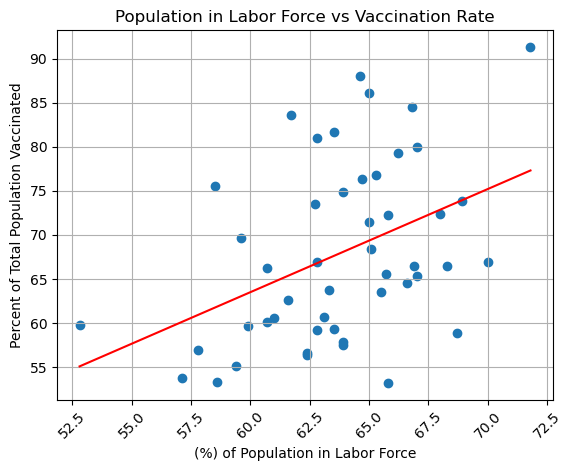

In [416]:
# We can check for correlation of vaccination rate with percent of population in labor force (per state).
# Again, remove % sign
vaccine_unemployed['In labor force'] = vaccine_unemployed['In labor force'].str.replace('%', '', regex=False)

# Correlation between vaccinated and unemployment rates
vaccine_unemployed_sorted = vaccine_unemployed.sort_values(by='In labor force')

# Convert to numeric type
vaccine_unemployed_sorted['Percent of total pop with a completed primary series'] = pd.to_numeric(vaccine_unemployed_sorted['Percent of total pop with a completed primary series'], errors='coerce')
vaccine_unemployed_sorted['In labor force'] = pd.to_numeric(vaccine_unemployed_sorted['In labor force'], errors='coerce')
vaccine_unemployed_sorted.dropna(subset=['Unemployed', 'Percent of total pop with a completed primary series'], inplace=True)

# Now, you can assign the columns to x_data and y_data
x_data = vaccine_unemployed_sorted['In labor force']
y_data = vaccine_unemployed_sorted['Percent of total pop with a completed primary series']

# Labeling
plt.xlabel('(%) of Population in Labor Force')
plt.ylabel('Percent of Total Population Vaccinated')
plt.title('Population in Labor Force vs Vaccination Rate')
plt.grid(True)

plt.xticks(rotation=45)  # Rotates labels by 45 degrees

# Linear regression line
x_data = vaccine_unemployed_sorted['In labor force']
y_data = vaccine_unemployed_sorted['Percent of total pop with a completed primary series']

slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

print(f"The r-value is: {r_value}")
# Calculate regression values
reg_values = x_data * slope + intercept

# Create scatter plot
plt.scatter(x_data, y_data)

# Add regression line to plot
plt.plot(x_data, reg_values, "r-")

# Show plot
plt.show()


In [417]:
# Analysis: We can see that there is a slight positive correlation
# between percent population in labor force and percent of total pop.
# vaccinated (R-value is 0.42) but not enough to make a conclusive
# statement. As there are more people in the labor force, more people
# are vaccinated. 